Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in heart_data.columns if heart_data[col].dtype == 'object']
num_cols = [col for col in heart_data.columns if heart_data[col].dtype != 'object']

<ipython-input-11-5e46e1bec810>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[column])
<ipython-input-11-5e46e1bec810>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[column])
<ipython-input-11-5e46e1bec810>:9: UserWarning: 

`distplot` is a deprecated function and will

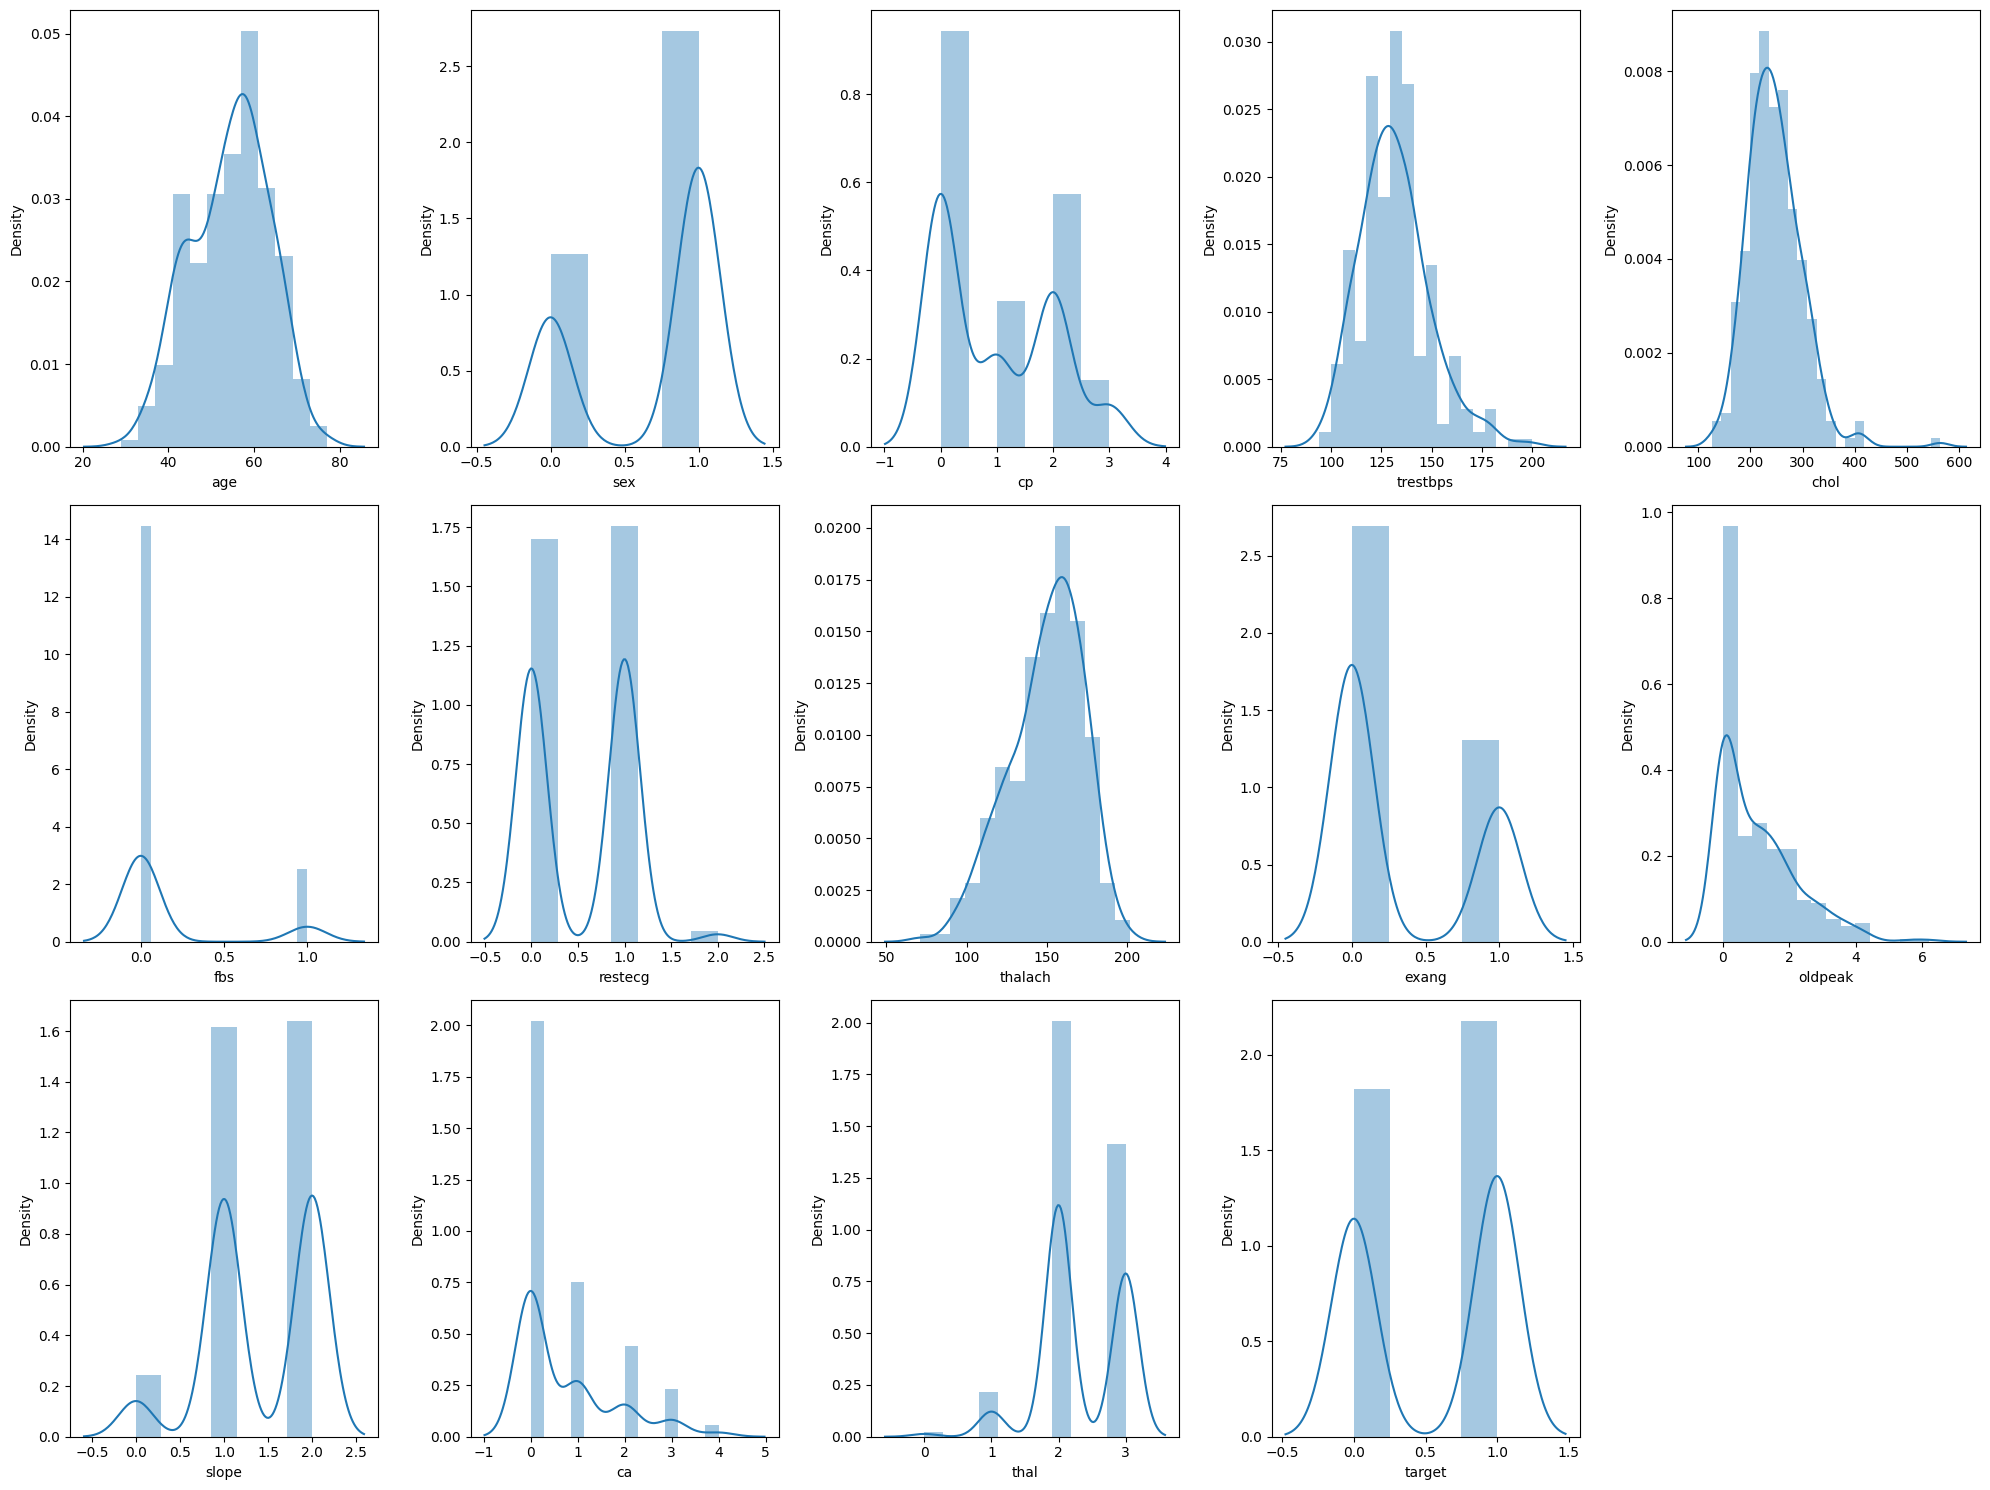

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(heart_data[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(heart_data[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [ ]:
X = standardized_data

In [ ]:
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8471074380165289


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7868852459016393


Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 2, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, Y_train)

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(Y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits
Training Accuracy of Decision Tree Classifier is 0.8636363636363636
Test Accuracy of Decision Tree Classifier is 0.7540983606557377 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(Y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(Y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Accuracy of Random Forest Classifier is 0.987603305785124
Test Accuracy of Random Forest Classifier is 0.7704918032786885 



Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(Y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(Y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")


Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.7868852459016393 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(Y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(Y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.7540983606557377 



Stochastic Gradient Boosting (SGB)

In [ ]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(Y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(Y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.7868852459016393 



XgBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(Y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(Y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.7540983606557377 



Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(Y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(Y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")


Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.7868852459016393 



LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(Y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(Y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

[LightGBM] [Info] Number of positive: 132, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545455 -> initscore=0.182322
[LightGBM] [Info] Start training from score 0.182322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

SVM

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
svm_datrn = accuracy_score(X_train_prediction, Y_train)
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
svm_datest = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the training data : ', svm_datrn)
print('Accuracy score of the test data : ', svm_datest)

Accuracy score of the training data :  0.859504132231405
Accuracy score of the test data :  0.819672131147541


In [ ]:
models = pd.DataFrame({
    'Model' : [  'LogisticRegression','Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Extra Trees Classifier','SVM'],
    'Score' : [ test_data_accuracy, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc,  etc_acc, svm_datest]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,SVM,0.819672
0,LogisticRegression,0.786885
3,Ada Boost Classifier,0.786885
5,Stochastic Gradient Boosting,0.786885
7,Extra Trees Classifier,0.786885
2,Random Forest Classifier,0.770492
1,Decision Tree Classifier,0.754098
4,Gradient Boosting Classifier,0.754098
6,XgBoost,0.754098


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

In [ ]:
import pickle

In [ ]:
filename = 'heart_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loading the saved model

loaded_model = pickle.load(open('heart_model.sav', 'rb'))

In [ ]:
input_data = (55,0,1,132,342,0,1,166,0,1.2,2,0,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.06988599 -1.46841752  0.03203122  0.02148802  1.85014386 -0.41763453
   0.89896224  0.71513086 -0.69663055  0.13837295  0.97635214 -0.71442887
  -0.51292188]]
[1]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



HEAT MAP

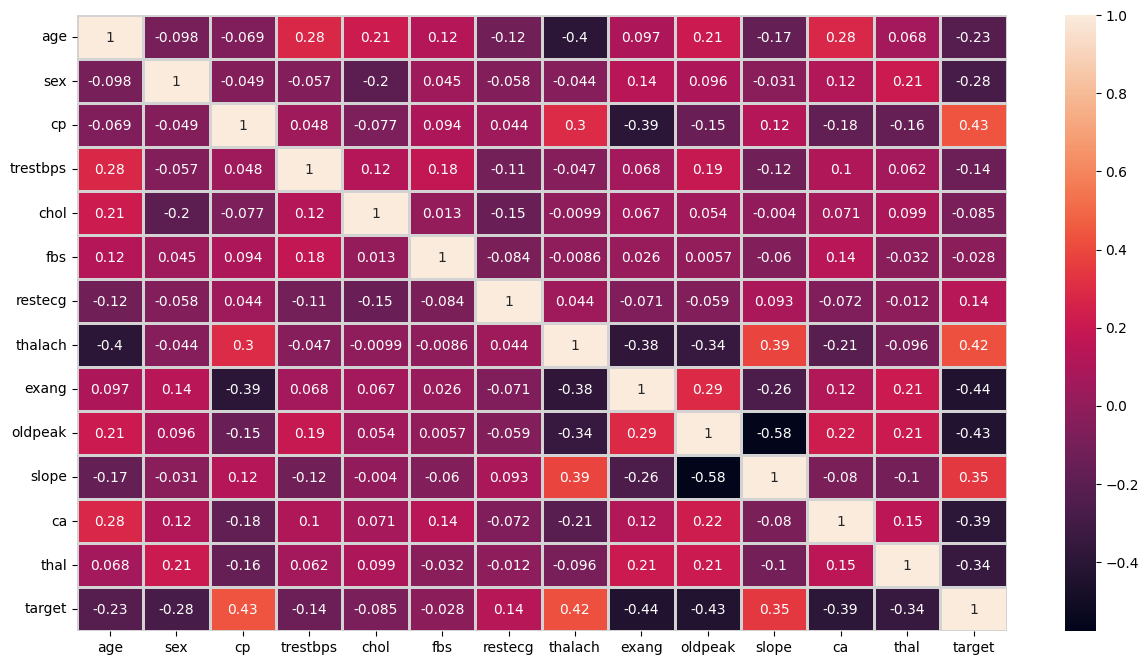

In [ ]:

plt.figure(figsize = (15, 8))

sns.heatmap(heart_data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()